# Distributions, PDFs and Likelihoods

In this part we will introduce three tools that are the basics of statistics: distributions (discrete or continuous), probability distribution functions (PDFs) and likelihoods (+ negative log likelihoods).

Useful links:
- [Intro to Probability Distributions and Distribution Fitting with Python's SciPy](https://towardsdatascience.com/probability-distributions-with-pythons-scipy-3da89bf60565)

In [1]:
!jupyter labextension install @jupyter-widgets/jupyterlab-manager
!jupyter labextension install jupyter-matplotlib
!jupyter nbextension enable --py widgetsnbextension

Building jupyterlab assets (production, minimized)
Building jupyterlab assets (production, minimized)
Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import rv_continuous, norm
from scipy.integrate import quad
from dataclasses import dataclass

In [2]:
from ipywidgets import interact
import ipywidgets as widgets
%matplotlib widget

In [3]:
events = 10000

fig, ax = plt.subplots(1, 1)

@interact(mean=widgets.FloatSlider(min=0, max=20, step=1, value=10), std=widgets.FloatSlider(min=0, max=10, step=0.1, value=5))
def plot_distribution(mean, std):
    ax.clear()
    ax.set_xlim(-10, 30)
    ax.set_ylim(0, 0.2)
    data = norm.rvs(mean, std, size=events)
    ax.hist(data, bins=100, density=True);

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=10.0, description='mean', max=20.0, step=1.0), FloatSlider(value=5.0, …

interactive(children=(FloatSlider(value=0.0, description='left', max=30.0, min=-10.0), FloatSlider(value=20.0,…

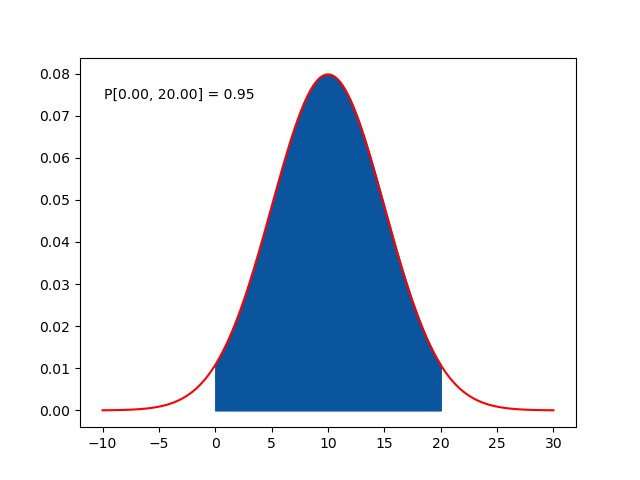

In [34]:
mean = 10
std = 5
min_x = -10
max_x = 30

def normal_probability_distribution_function(x):
    return norm.pdf(x, mean, std)

# freeze distribution
norm_10_2 = norm(mean, std)

x = np.linspace(min_x, max_x, 1000) # sample x axis

fig, ax = plt.subplots()
ax.set_xlim(min_x, max_x)

@interact(left=widgets.FloatSlider(min=min_x, max=max_x, step=0.1, value=0), right=widgets.FloatSlider(min=min_x, max=max_x, step=0.1, value=20))
def update_integral(left, right):
    res, err = quad(normal_probability_distribution_function, left, right)
    ax.clear()
    ax.plot(x, norm_10_2.pdf(x), 'r-')
    ptx = np.linspace(left, right, 100)
    ax.fill_between(ptx, norm_10_2.pdf(ptx), color='#0b559f')
    ax.text(0.2, 0.9, 'P[{:.2f}, {:.2f}] = {:.2f}'.format(left, right, res), horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

In [50]:
@dataclass
class Likelihood:
    distribution: rv_continuous
    data: np.ndarray

    def __call__(self, *params):
        return np.prod(np.array([self.distribution.pdf(x, *params) for x in self.data]))

class NLL(Likelihood):
    def __call__(self, *params):
        return -np.sum(np.array([np.log(self.distribution.pdf(x, *params)) for x in self.data]))

interactive(children=(FloatSlider(value=10.0, description='mean', max=20.0, step=1.0), FloatSlider(value=5.0, …

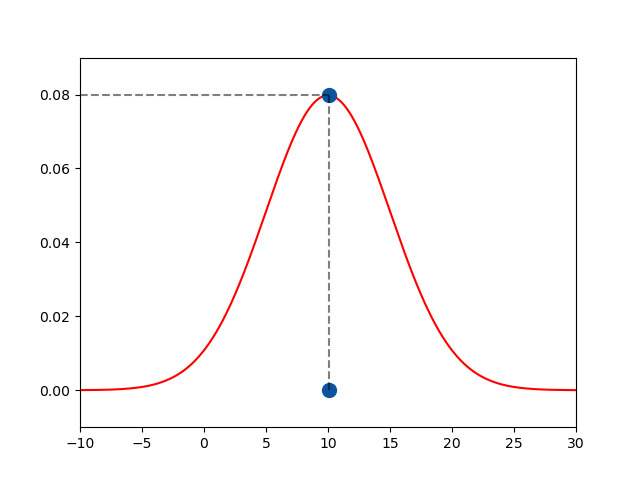

In [76]:
mean = 10
std = 5
min_x = -10
max_x = 30

x = np.linspace(min_x, max_x, 1000) # sample x axis

fake_single_data = np.array([mean + 0.01 * mean])
norm_likelihood = Likelihood(norm, fake_single_data)

fig, ax = plt.subplots()

@interact(mean=widgets.FloatSlider(min=0, max=20, step=1, value=10), std=widgets.FloatSlider(min=4.5, max=8, step=0.1, value=5))
def plot_pdf(mean, std):
    lk_value = norm_likelihood(mean, std)
    ax.clear()
    ax.set_xlim(min_x, max_x)
    ax.set_ylim(-0.01, 0.09)
    ax.plot(x, norm(mean, std).pdf(x), 'r-')
    ax.plot(fake_single_data, 0, 'o', color='#0b559f', markersize=10)
    ax.plot(fake_single_data, lk_value, 'o', color='#0b559f', markersize=10)
    ax.hlines(lk_value, min_x, fake_single_data[0], color='black', linestyle='dashed', alpha=0.5)
    ax.vlines(fake_single_data[0], 0, lk_value, color='black', linestyle='dashed', alpha=0.5)